# 1. Simple Linear Regression
***

- Linear regression is the simplest machine learning algorithm you'll encounter
    - Especially *simple linear regression*
- It is a simple algorithm initially developed in the field of statistics and was studied as a model for understanding the relationship between input and output variables
- It is a linear model - assumes linear relationship between input variables (X) and the output variable (y)
- Used to predict continious values (e.g., weight, price...)

#### Simple vs. Multiple linear regression
- Simple linear regression solves problems with only one input feature
- Multiple linear regression solves problems with multiple input features

#### Assumptions
1. **Linear Assumption** — model assumes the relationship between variables is linear
2. **No Noise** — model assumes that the input and output variables are not noisy — so remove outliers if possible
3. **No Collinearity** — model will overfit when you have highly correlated input variables
4. **Normal Distribution** — the model will make more reliable predictions if your input and output variables are normally distributed. If that’s not the case, try using some transforms on your variables to make them more normal-looking
5. **Rescaled Inputs** — use scalers or normalizer to make more reliable predictions

#### Take-home point
- Training a simple linear regression model is as simple as solving a couple of equations

<br>

## Math behind
- In a nutshell, simple linear regression is based on coefficients - $ \beta_{0} $ and $ \beta_{1} $ which you need to find in order to solve a line equation:

**Line equation:**

$ \Large y = \beta_{0} + \beta_{1}x $

- The $ \beta_{1} $ coefficient has to be calculated first
- It tells you the slope of the line

**B1 coefficient:**

$ \Large \beta_1 = \frac{\sum_{i=1}^{n}(x_i - \bar{x}) \times (y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2} $

- The $ \beta_{0} $ coefficient relies on the slope 
- It represents Y-intercept - location at which the line intercepts the Y-axis

**B0 coefficient:**

$ \Large \beta_0 = \bar{y} - \beta_1 \times \bar{x} $

<br>

- Let's implement simple linear regression with pure Numpy next

## Implementation
- You'll need only Numpy to implement the logic
- Matplotlib is used for optional visualizations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (14, 7)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

<br>

- The `SimpleLinearRegression` class is written to follow the familiar Scikit-Learn syntax
- The coefficients are set to `None` at the start - `__init__()` method
- The `fit()` method calculates the coefficients
- The `predict()` method essentially implements the line equation
    - Before it does so, it makes sure the coefficients have been calculated

In [2]:
class SimpleLinearRegression:
    '''
    A class which implements simple linear regression model.
    '''
    def __init__(self):
        self.b0 = None
        self.b1 = None
    
    def fit(self, X, y):
        '''
        Used to calculate slope and intercept coefficients.
        
        :param X: array, single feature
        :param y: array, true values
        :return: None
        '''
        numerator = np.sum((X - np.mean(X)) * (y - np.mean(y)))
        denominator = np.sum((X - np.mean(X)) ** 2)
        self.b1 = numerator / denominator
        self.b0 = np.mean(y) - self.b1 * np.mean(X)
        
    def predict(self, X):
        '''
        Makes predictions using the simple line equation.
        
        :param X: array, single feature
        :return: None
        '''
        if not self.b0 or not self.b1:
            raise Exception('Please call `SimpleLinearRegression.fit(X, y)` before making predictions.')
        return self.b0 + self.b1 * X

<br>

## Testing
- Let's create some dummy data
    - X contains a list of numbers between 1 and 300 (1, 2, 3, ..., 299, 300)
    - y contains normally distributed values centered around X with standard deviation of 20
- The source data is then visualized:

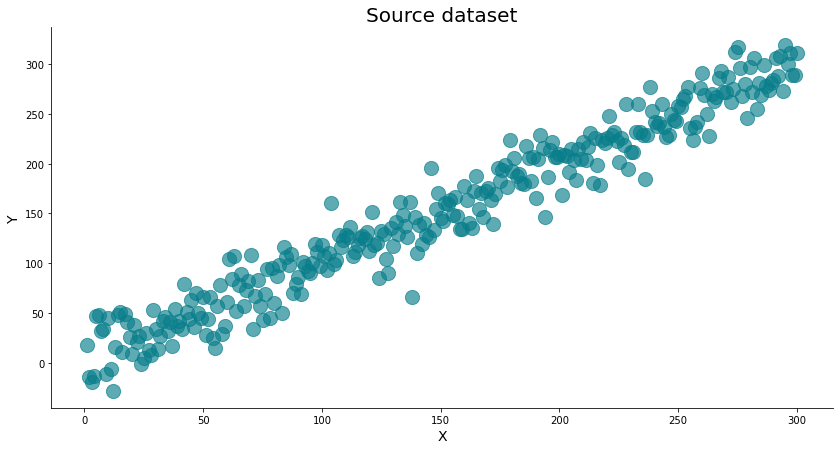

In [13]:
X = np.arange(start=1, stop=301)
y = np.random.normal(loc=X, scale=20)

plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65)
plt.title('Source dataset', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.show()

- For validation sake, we'll split the dataset into training and testing parts:

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- You can now initialize and train the model, and afterwards make predictions:

In [5]:
model = SimpleLinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

- Here's how you can get the coefficients:

In [6]:
model.b0, model.b1

(-1.357484948041531, 1.0026529556316826)

- These are the predictions:

In [7]:
preds

array([203.183718  , 266.35085421, 152.04841726,   8.66904461,
       233.26330667, 226.24473598, 196.16514731, 108.93434017,
         4.65843279, 175.10943524, 237.27391849,  56.79638648,
       218.22351234,  44.76455101, 182.12800593, 221.2314712 ,
       289.41187219, 211.20494165, 148.03780544, 165.08290569,
        77.85209855, 112.94495199, 249.30575396, 250.30840692,
       103.92107539,  41.75659214, 281.39064854, 295.42778992,
       157.06168204, 238.27657145,  16.69026825, 164.08025273,
        32.73271554,  23.70883894, 215.21555347, 118.96086973,
         6.6637387 ,  89.88393401,  45.76720397,  72.83883377,
        92.89189288,  75.84679264, 286.40391332,  59.80434535,
        76.84944559,  62.81230421, 234.26595963, 229.25269485,
       110.93964608, 231.25800076, 180.12270002, 144.02719362,
       239.2792244 ,  74.84413968, 297.43309583, 278.38268967,
        96.9025047 ,  91.88923993, 192.15453549,  24.7114919 ])

- And these are the original values
- Original and predicted differ, but not much

In [8]:
y_test

array([172.82805782, 283.3300709 , 177.1068791 ,  27.9438542 ,
       214.47001869, 243.35879032, 205.90314191,  94.5522279 ,
        11.19157047, 173.20563392, 256.28649511,  44.49145963,
       216.26667223,  44.27010021, 164.04011246, 211.49744959,
       286.44049821, 194.02732791, 145.58358329, 152.44907221,
        70.24780401, 120.27235853, 265.36726913, 253.71084646,
       112.52053351,  52.56406511, 262.62459803, 286.59835555,
       148.02385127, 267.33995293,  17.4622062 , 166.86946175,
         5.03209417,   4.14660253, 250.58069693, 161.39264258,
        14.63838047,  98.31216323,  20.81979002,  50.46766553,
        85.72115403,  16.94505755, 278.96397547,  67.44649982,
        89.58030777,  60.48209422, 255.64761406, 268.10762251,
       107.107752  , 193.88558495, 175.54179004, 138.51089563,
       249.48163112,  23.89018469, 289.20083967, 309.18776318,
       114.06849759, 147.78404606, 209.81963409,  -1.11982849])

- You can now evalute the model by calculating RMSE
    - Root Mean Squared Error
- On average, the model is 21.35 units wrong
- It makes sense, as standard deviation of the dataset is 20

In [9]:
from sklearn.metrics import mean_squared_error

rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))
rmse(y_test, preds)

21.351850699502787

<br>

## Visualize the Best-Fit line
- If you re-train the model of the entire dataset and then make predictions for the entire dataset, you'll get the best fit line
- You can then visualize this line with Matplotlib:

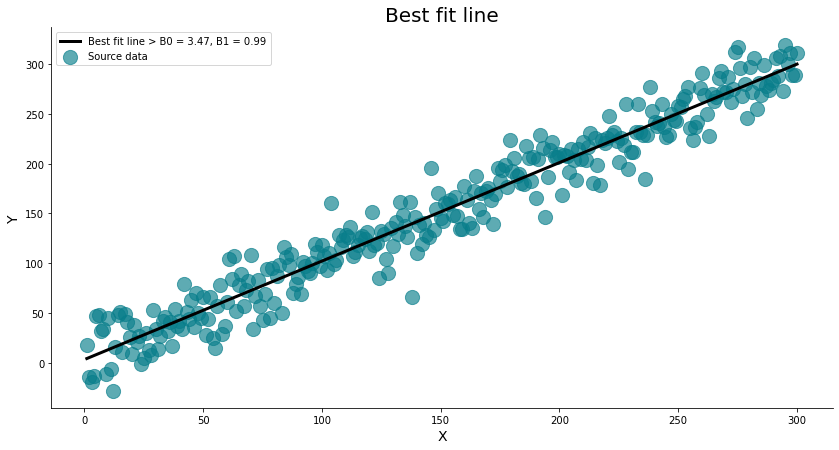

In [14]:
model_all = SimpleLinearRegression()
model_all.fit(X, y)
preds_all = model_all.predict(X)

plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65, label='Source data')
plt.plot(X, preds_all, color='#000000', lw=3, label=f'Best fit line > B0 = {model_all.b0:.2f}, B1 = {model_all.b1:.2f}')
plt.title('Best fit line', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.legend()
plt.show()

<br>

## Comparison with Scikit-Learn
- We want to know if our model is good, so let's compare it with `LinearRegression` model from Scikit-Learn
- The input data must be reshaped beforehand:

In [11]:
from sklearn.linear_model import LinearRegression

sk_model = LinearRegression()
sk_model.fit(np.array(X_train).reshape(-1, 1), y_train)
sk_preds = sk_model.predict(np.array(X_test).reshape(-1, 1))

sk_model.intercept_, sk_model.coef_

(-1.3574849480416162, array([1.00265296]))

- Our coefficients were (-1.357484948041531, 1.0026529556316826)
- Not identical, but within a margin of error
- Let's check the RMSE:

In [12]:
rmse(y_test, sk_preds)

21.351850699502783

- Ours was 21.351850699502787, so nearly identical.